In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pmlb as dsets
import numpy as np
import pickle as pkl
from os.path import join as oj
from copy import deepcopy
import pandas as pd

# sklearn models
sys.path.append('../scores')
import scores
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
data_dir = '/scratch/users/vision/data/pmlb'
out_dir = '/scratch/users/vision/chandan/pmlb'
dset_names = deepcopy(dsets.classification_dataset_names)
dset_names.remove('kddcup') # # remove biggest dset
dset_names.remove('mnist') # # remove biggest dset
dset_names.remove('poker') # # remove biggest dset

dset_names = np.array(dset_names)
random_state = 42 # for each train_test_split

# train models
this code will save all the **classification** dsets and fit very quick models to each of them

In [9]:
# logit_test_scores = []
# rf_test_scores = []
# rfs = []

# for dset_name in tqdm(dset_names):
#     X, y = dsets.fetch_data(dset_name, return_X_y=True, 
#                       local_cache_dir=data_dir)
    
    
#     train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=random_state)
    
#     logit = LogisticRegression(solver='liblinear', multi_class='auto') # liblinear best for small dsets, otherwise lbfgs
#     rf = RandomForestClassifier(n_estimators=100)
# #     print(dset_name, X.shape)
#     logit.fit(train_X, train_y)
#     rf.fit(train_X, train_y)
    
#     logit_test_scores.append(logit.score(test_X, test_y))
#     rf_test_scores.append(rf.score(test_X, test_y))
#     rfs.append(deepcopy(rf))
    
# # save
# logit_test_scores = np.array(logit_test_scores)
# rf_test_scores = np.array(rf_test_scores)
# classification_results = {'logit_test_score': logit_test_scores,
#            'rf_test_score': rf_test_scores,
#            'dset_name': dset_names,
#            'rf': rfs}
# pkl.dump(classification_results, 
#          open(oj(out_dir, 'classification_results.pkl'), 'wb'))

# analyze results

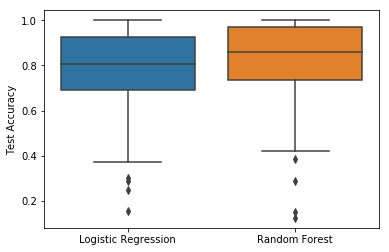

In [4]:
results = pd.DataFrame(pkl.load(open(oj(out_dir, 'classification_results.pkl'), 'rb')))

# plot
sns.boxplot(data=[results['logit_test_score'], results['rf_test_score']])
plt.xticks([0, 1], ['Logistic Regression', 'Random Forest'])
plt.ylabel('Test Accuracy')
plt.show()

# rank features

look at one dset

In [5]:
idxs_mask = results['rf_test_score'] - results['logit_test_score'] > 0.1 # get dsets where rf outperforms logistic
r = results[idxs_mask]
print(results.shape, r.shape)
print('num idxs after filtering', np.sum(idxs_mask))
# idxs = np.arange(idxs_mask.size)[idxs_mask] # get actual indexes for this mask
row = r.iloc[0]

dset_name = row.dset_name # results['dset_names'][idx_0] #dsets.classification_dataset_names[0]
X, y = dsets.fetch_data(dset_name, return_X_y=True, 
                  local_cache_dir=data_dir)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=random_state)
rf = row.rf
assert(rf.score(test_X, test_y) == row.rf_test_score) # check that acc matches

(163, 4) (39, 4)
num idxs after filtering 39


In [7]:
feature_scores = scores.get_importance_scores(rf, score_type='mda', X=test_X, Y=test_y)
print(feature_scores)

[ 0.001  -0.01   -0.0125 -0.0065 -0.005   0.003   0.009  -0.0035  0.01
  0.005   0.005  -0.008  -0.004  -0.0005  0.006   0.015   0.0035  0.0215
  0.186   0.188 ]
